# PRACTICA 2b - Web Scraping

## 0. INTRODUCCIÓN

En este vamos a trabajar la extracción automática de datos de la web, proceso Conocido como web scraping. Antes de ponernos manos a la obra, vamos a Refrescar algunos conceptos e introducir puntos claves de las librerías con las que vamos a trabajar. 
 
En la web, los servidores y los clientes generalmente se comunican a través de solicitudes HTTP. 
El protocolo HTTP (‘Hyper Text Transfer Protocol’) especifica cómo se formatean y transmiten las solicitudes y respuestas. 
Mediante este proceso solicitud-respuesta, es como se realiza la mayor parte de la navegación web. Al abrir una página, el navegador envía una solicitud al servidor de esa página, y el servidor responde con los recursos relevantes (texto, imágenes, tablas, etc. ).

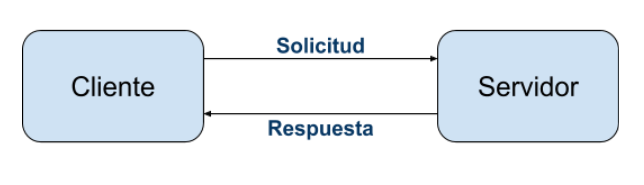






Principalmente, hay dos tipos de **solicitudes**:

1.   GET


 	
- Permiten obtener datos del servidor.
- Se puede marcar como favorito. 		
- Los parámetros se agregan directamente a la URL.
- No se utiliza para enviar información confidencial (como contraseñas)
 			

2.   POST
 	
- Normalmente	se usa cuando un estado necesita ser alterado (como agregarle elementos carrito de compras) o al enviar contraseñas.
- Los parámetros se agregan en un cuerpo separado, así es más seguro
- No se puede marcar como favorito.
 	
 


La **respuesta** contiene 2 piezas principales de información: el código de estado y el cuerpo de la respuesta.
 
- El __código de estado__ indica si la solicitud fue exitosa y / o la existencia de algún error. Está representado por un número de 3 dígitos.

  - Los códigos en estos rangos indican:

    - 2xx: Éxito.
    - 3xx: Redirección.
    - 4xx: Error del cliente.
    - 5xx: Error del servidor.
 
  - Los dos códigos más frecuentes son los siguientes:
    - 200 OK: La solicitud se cursó exitosamente.
    - 404 Not Found: El servidor no puede encontrar la página o fuente solicitada. 

- El __cuerpo de la respuesta__ contiene la información de la solicitud. Normalmente, se obtiene en formato HTML o JSON.



---

Un **documento HTML** está formado por un conjunto de elementos o etiquetas anidadas, además de código JavaScript y CSS.

Antes de hacer scraping, por tanto, debemos conocer qué elementos o qué etiqueta contiene la información que queremos obtener de la página web en cuestión. Para ello, tenemos que tener presente las siguientes consideraciones:

- Un elemento o etiqueta tiene la siguiente sintaxis:

> **\<nombre_etiqueta\>**contenido **\<\/nombre_etiqueta\>**

> Estos elementos pueden tener información adicional especificada en los atributos de la etiqueta.


- Los atributos más comunes son:

  - id

  - class

> Ejemplo: \<div class=“descriptive-class-name”\>….\<\/div\>





- Las etiquetas más populares son:

  - link: \<a href=“url_of_link”\>Texto del link\<\/a\>
  - párrafo: \<p\>…\<\/p\>
  - .... \<h1\>…\<\/h1\>
  - etiqueta de un contenedor o conjunto de etiquetas: \<div class=“hahaha”\>…\<\/div\>
  - Etiqueta para marcar parte del contenido: \<span id=“id de este span”\>…\<\/span\>








_Ejemplo esquema básico de un documento HTML_




```
<html>
	<head>
		<meta charset=”utf-8”/>
		<title> Ejemplo </title>
	</head>
	<body>
		<h1> Encabezado 1</h1>
		<p> Primer párrafo del ejemplo del html de ejemplo. </p>
		<h2> Encabezado 2.  </h2>
			<ul>
				<li>Element 1 de la lista</li>
				<li>Element 2 de la lista</li>
			</ul>
    <div>
      <p>Segundo párrafo. </p> 
      <table>
        <th>Tabla de ejemplo </th>
        <tr>
          <td>celda 1,1 </td>
          <td>celda 1,2 </td>
          <td>celda 1,3 </td>
        </tr>
        <tr>
          <td>celda 2,1 </td>
          <td>celda 2,2 </td>
          <td>celda 2,3 </td>
        </tr>
      </table>
    </div>
	</body>
</html>

```




---

Las **principales metodologías** que nos permiten hacer web scraping son:

- Utilizando APIs (Application programming interface)
- Mediante Scrapers (librerías que nos permiten extraer datos web automáticamente. Por ejemplo, BeautifulSoap, Requests-html,...)
- Web crawling (un programa ‘spider’ busca por el contenido solicitado siguiendo links y explorandolos).
 



**Las dos primeras metodologías las vamos a trabajar en las diferentes partes de esta PRACTICA mediante los ejercicios planteados. La tercera de ellas, junto con el web scraping en streaming, la trabajaremos en la PAC3.**

## 2. WEB SCRAPING CON BEAUTIFUL SOAP


**Beautiful Soup** es una librería de Python para extraer datos de un documento HTML. Esta se basa en analizar el HTML con la ayuda de un parser.

Un **parser**, en el contexto del web scraping, es un programa diseñado para recorrer la estructura de árbol o de componentes anidados de un documento HTML de forma que se pueda identificar y acceder fácilmente los diferentes elementos del mismo.

Hay diferentes parsers disponibles que pueden ser utilizados y seleccionados para ser utilizados con Beautiful Soup. 

- 'html.parser'
- 'lxml' (Es el mejor valorado por BeautifulSoap en la mayoría de los casos)
- 'html5lib'

En caso de no ser especificado ningún parser, Beautiful Soup escoge el que considera más adecuado. 

Una vez creado el objeto BeautifulSoap, es recomendable abrir el html generado para comprobar que se ha _parseado_ correctamente. Es decir, que se ha recogido correctamente la estructura del documento HTML. 




Los *métodos más útiles* de esta librería, con los que vamos a trabajar en esta parte son:

- **find(“p”, class=“footer-text”)**: extrae el primera etiqueta párrafo con clase = “footer-text”
- **find_all(“a”)**: extrae todos los links de la página
-**tag.attrs**: devuelve un diccionario con todos los atributos de la etiqueta.
-**tag.text**: devuelve todo el texto que contiene la etiqueta
-**tag.contents**: devuelve una lista de todos los elementos hijo dentro de la etiqueta.

Para conocer más funcionalidades de la librería, se recomienda que visitéis la siguiente página donde aparece su documentación:  https://www.crummy.com/software/BeautifulSoup/bs4/doc/

Los **principales pasos** que debemos seguir en un proyecto de web scraping con BeautifulSoup son los siguientes:

1. Cargar las librerías que se van a utilizar
2. Inspeccionar la página que se desee scrapear (*)
3.  Escoger el parser
4. Crear el objeto BeaurifulSoup
5. Exportar el HTML a un archivo para comprobar que el objeto BeautifulSoup se ha creado correctamente y/o dónde está la información de interés.
6. Determinar cuáles son las etiquetas del documento HTML que contiene la información que nos interesa scrapear. 
7. Aplicar los métodos disponibles en la librería BeautifulSoup para obtener el contenido deseado
8. Organizar el contenido _scrapeado_ en la estructura deseada o más conveniente de acuerdo con los datos obtenidos. 




---
> (\*) Inspeccionar la página que se desee scrapear

**Para inspeccionar una página web se recomienda utilizar el inspector de páginas web disponible en los navegadores.**

En el caso de google Chrome, se puede acceder a él mediante haciendo _click derecho -> inspector_ en la página web que queremos inspeccionar. 

Una vez abierto el inspector, abrir la pestaña "Developer". Desde aquí se puede navegar por el documento HTML, buscar e identificar los elementos y etiquetas donde se encuentra el contenido que se desea _scaprear_. 

_Ejemplo del inspector de páginas web:_

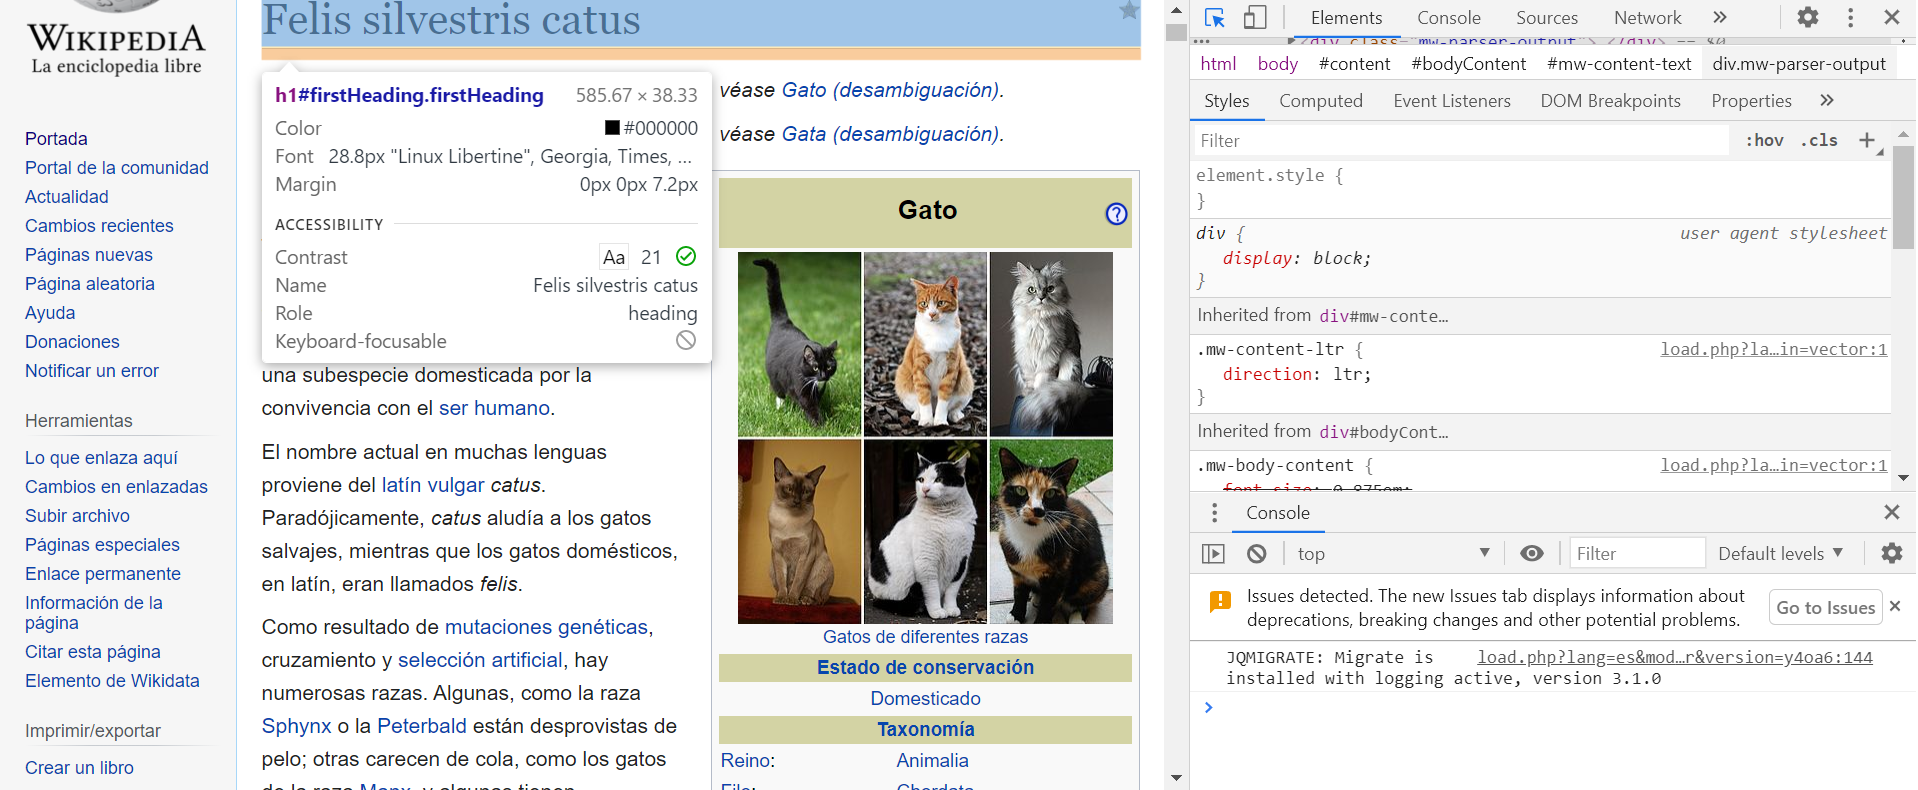


---








Para empezar a trabajar esta parte, vamos a ver cómo scrapear contenido de la Wikipedia, concretamente, vamos a obtener la lista de las festividades más relevantes de España, los enlaces donde podemos encontrar mayor información y una breve descripción de las mismas.


Teniendo en cuenta los ejemplos explicativos, el estudiante deberá realizar los ejercicios prácticos que se proponen a continuación.

In [ ]:
# Cargar librerías
import requests
from bs4 import BeautifulSoup

In [ ]:
# Definir la url de la web que se desee scrapear
url_base = "https://es.wikipedia.org/wiki/Turismo_en_Espa%C3%B1a"

# Hacer la solicitud
respuesta = requests.get(url_base)
respuesta.status_code

In [ ]:
# Extraer el HTML
html = respuesta.content

# Convertir HTML a BeautifulSoup object. 
soup = BeautifulSoup(html, "html.parser")

# Exportiar el HTML a un archivo
with open('Wiki_respuesta.html', 'wb') as file:
    file.write(soup.prettify('utf-8'))

En el explorador de archivos del Collaboratory (desplegar el menú de la izquierda), podemos abrimos el fichero generado _Wiki_respuesta.html_ para revisar la estructura de la página web. 

Este ejercicio junto con la el inspector de paginas web disponible en el navegador, nos permitirá localizar dónde se encuentra la información que nos interesa (Festivos de España).


Si nos fijamos, podemos ver que la información de interés está contenida en los enlaces (\<a\>) del último párrafo (\<p\>).

In [ ]:
#Obtener todos los links del último párrafo
links=soup.find_all('p')[-1].find_all('a')
links

La url que aparece asociada a cada festividad es una url relativa. Por tanto, para obtener la dirección url completa podemos utilizar la función _urljoin_.

In [ ]:
from urllib.parse import urljoin

# Extraer el nombre de la festividad (asociado con el atribut 'title' del elemento 'a')
nombre_links=[l.get('title') for l in links]

# Extraer el valor de la url relativa (asociada con el atribut 'href' del elemento 'a')
url_rel_links=[l.get('href') for l in links]  

#Transformar los links relativos a absolutos
url_complet_links = [urljoin(url_base, url) for url in url_rel_links]

In [ ]:
# Extraer solo las url que apuntan a Wikipedia (url internas)
links_int = [url for url in url_complet_links if 'wikipedia.org' in url]
links_int

In [ ]:
nombre_links

Para poder obtener la breve descripción de cada una de las festividades asociadas a los links anteriores, vamos a scrapear el contenido de dichas urls y obtener la información contenida en el primer párrafo (asumimos que en él es dónde se hace la introducción del concepto). Para ello, construiremos un bucle que en cada iteración obtenga datos de cada url. Antes de cada solicitud al servidor esperaremos un segundo para controlar el tiempo y asegurarnos de que se puedan ejecutar correctamente las solicitudes.  

In [ ]:
# Cargar la librería time 
import time

In [ ]:
# inicializar la lista donde se van a guardar los parrafos con la breve descripción
par_text = []

# Bucle para scrapear cada link
i = 0
for url in links_int:

    # wait for 1 second before each request
    time.sleep(1)
    
    # connect to every webpage
    p_resp = requests.get(url)
    
    # checking if the request is successful
    if p_resp.status_code == 200:            # OK!
        print('URL #{0}: {1}'.format(i+1,url))    # imprimir el numero de iteración junto con la url 
    
    else:                                       
        print('Status code {0}: Skipping URL #{1}: {2}'.format(p_resp.status_code, i+1, url)) #Imprimir el error
        i = i+1
        continue
        
    
    # obtener HTML
    p_html = p_resp.content
    
    # convertir HTML a objeto BeautifulSoup
    p_soup = BeautifulSoup(p_html, 'lxml')
    
    # obtener texto relativo al primer párrafo
    p_pars = p_soup.find("p").text
        
    # Añadir el párrafo a la lista de párrafos
    par_text.append(p_pars)
    
    # Incrementing the loop counter
    i = i+1

In [ ]:
url_and_info = dict(zip(links_int, par_text)) 
url_and_info



---

Otra ejemplo con el que vamos a trabajar es la obtención de información de las 150 peliculas de cómedia definidas como esenciales según la web Rotten Tomatoes (https://editorial.rottentomatoes.com/guide/essential-comedy-movies/).  


Si nos fijamos en este artículo, cada película viene acompañada por su título, año, puntuación, crítica, sinopsis, protagonistas y director.

En una primera instancia, vamos a obtener la información relativa al título de la película y la puntuación que tiene. El resto de características de las películas serán obtenidas en el ejercicio práctico 5 por el alumno.  


In [ ]:
# Cargar librerías
import requests
from bs4 import BeautifulSoup

In [ ]:
# Definir la url de la web que se desee scrapear
url_base = "https://editorial.rottentomatoes.com/guide/essential-comedy-movies/"

# Hacer la solicitud
respuesta = requests.get(url_base)
respuesta.status_code

In [ ]:
# Extraer el HTML
html = respuesta.content

# Convertir HTML a BeautifulSoup object. 
soup = BeautifulSoup(html, "html.parser")

# Exportiar el HTML a un archivo
with open('RottenTomatoes.html', 'wb') as file:
    file.write(soup.prettify('utf-8'))

Si abrimos el archivo _RottenTomatoes.html_ podemos advertir que no ha sido parseado correctamente. Es por eso que, vamos a dejar que Beautifulsoup elija el parser que considere conveniente o especificar el uso del parser _'lxml'_ que normalmente ofrece mejores resultados.

In [ ]:
# Convertir HTML a BeautifulSoup object. 
soup = BeautifulSoup(html, 'lxml')

# Exportiar el HTML a un archivo
with open('RottenTomatoes_lxml.html', 'wb') as file:
    file.write(soup.prettify('utf-8'))

Revisando el HTML, la información que nos interesa está en la primera etiqueta _h2_ de la etiqueta _div_ cuyo atributo _class_ = _"col-sm-18 col-full-xs countdown-item-content"_

In [ ]:
divs = soup.find_all("div", {"class": "col-sm-18 col-full-xs countdown-item-content"})
h2s = [div.find("h2") for div in divs]
h2s[:10] #Mostrar 10 primeras

In [ ]:
#Obtener título de las películas
titulo_peliculas=[heading.find('a').text for heading in h2s]
# titulo_peliculas=[heading.find('a').string for heading in h2s] (es equivalente!)
titulo_peliculas[:10] #Mostrar 10 primeras


Una forma alternativa para incluir en la lista de títulos un valor _None_ en el caso de que no apareciera texto en el enlace sería la siguiente: 


In [ ]:
titulo_peliculas = [None if heading.find("a") is None else heading.find("a").string for heading in h2s]

In [ ]:
#Obtener puntuación
span_score=[heading.find("span",{"class":"tMeterScore"}) for heading in h2s]
puntuacion_pelicula=[element.text for element in span_score]
puntuacion_pelicula[:10] #Mostrar 10 primeras


In [ ]:
print('número títulos películas: ', len(titulo_peliculas))
print('número puntuaciones películas: ', len(puntuacion_pelicula))